In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
file_path = 'C:/Users/Demi/Desktop/TB2/Mini project/fake_transactional_data_24 (1).csv'
data = pd.read_csv(file_path)

data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [3]:
data.tail()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025
10148279,53444.0,2.65,A_LOCAL_COFFEE_SHOP,31/12/2025


In [4]:
data.shape

(10148280, 4)

In [5]:
data.isnull().sum()

from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [7]:
data.describe(include="all")

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
count,1.014828e+07,1.014828e+07,10148280,10148280
unique,NaN,NaN,14300,364
top,NaN,NaN,PUB,12/12/2025
freq,NaN,NaN,834380,52379
mean,5.080502e+04,1.839348e+01,NaN,NaN
std,2.893710e+04,8.612323e+01,NaN,NaN
min,1.000000e+03,1.450000e+00,NaN,NaN
25%,2.530400e+04,2.650000e+00,NaN,NaN
50%,5.078100e+04,6.000000e+00,NaN,NaN
75%,7.563300e+04,1.200000e+01,NaN,NaN


In [8]:
data['to_randomly_generated_account'].value_counts()

to_randomly_generated_account
PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: count, Length: 14300, dtype: int64

In [9]:
data['not_happened_yet_date'].value_counts()

not_happened_yet_date
12/12/2025    52379
19/12/2025    51982
05/12/2025    51401
01/08/2025    50682
11/07/2025    47683
              ...  
30/01/2025    16380
31/03/2025    16360
31/07/2025    16351
30/10/2025    16330
02/01/2025    16089
Name: count, Length: 364, dtype: int64

In [10]:
data[data.duplicated()]

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
156,69941.0,5.50,PUB,01/01/2025
157,69941.0,5.50,PUB,01/01/2025
211,96941.0,6.00,WINE_BAR,01/01/2025
225,11202.0,2.40,PRETENTIOUS_COFFEE_SHOP,01/01/2025
254,55042.0,2.65,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025
...,...,...,...,...
10148193,38552.0,5.00,BAR,31/12/2025
10148194,38552.0,5.00,BAR,31/12/2025
10148195,38552.0,5.00,BAR,31/12/2025
10148210,25930.0,2.65,A_LOCAL_COFFEE_SHOP,31/12/2025


# Time  Series

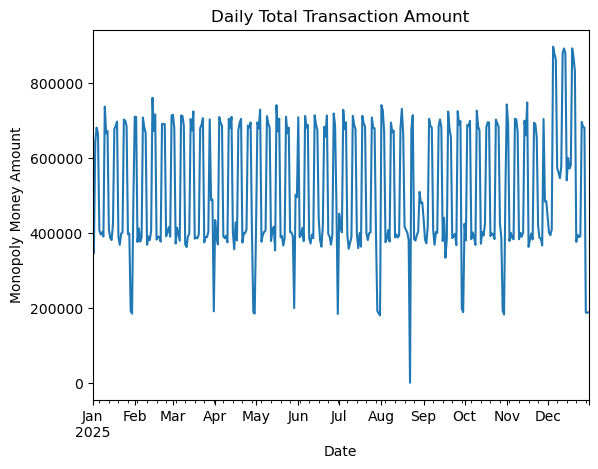

In [11]:
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

data.set_index('not_happened_yet_date', inplace=True)

daily_total = data['monopoly_money_amount'].resample('D').sum()

daily_total.plot()
plt.title('Daily Total Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.show()

There are obvious cyclical changes in the data set 周期性

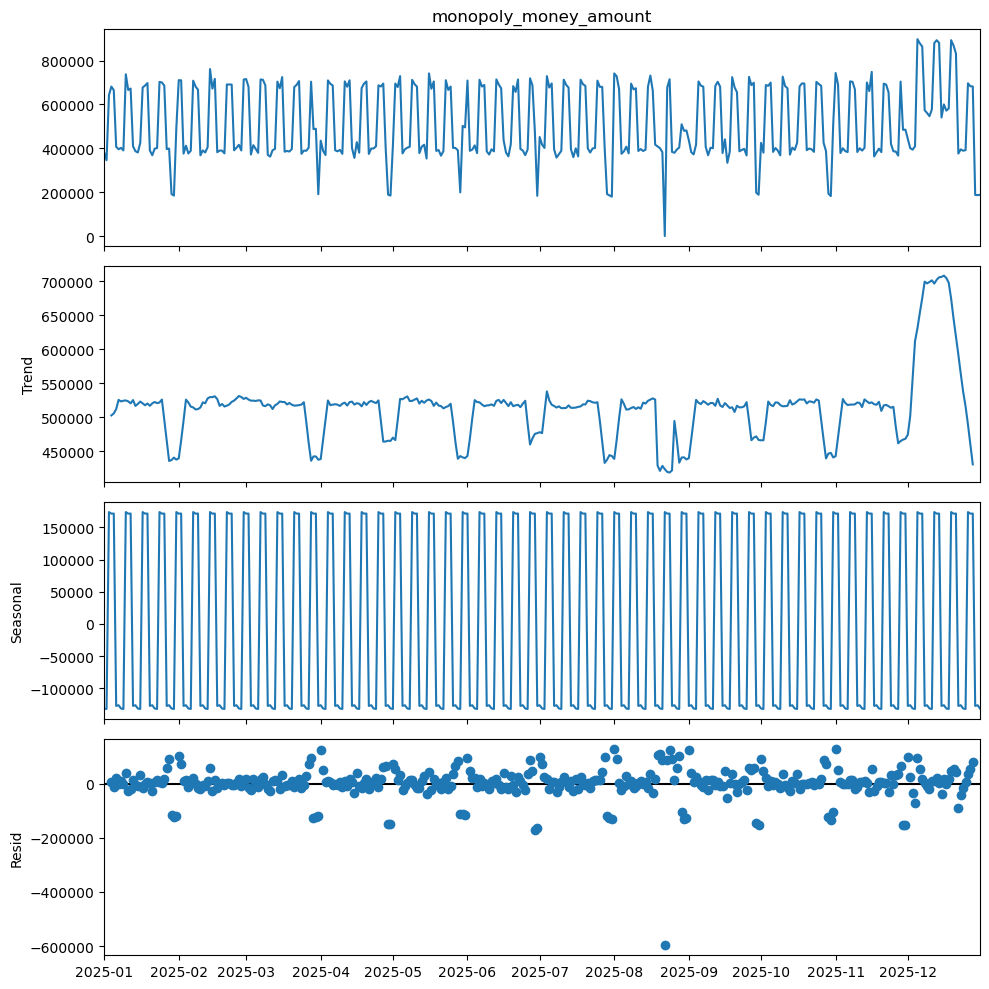

In [12]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series to observe, trend, seasonality, and residuals
result = seasonal_decompose(daily_total, model='additive')

plt.rcParams.update({'figure.figsize': (10,10)})
result.plot()
plt.show()

原始时间序列、长期趋势、季节性和残差  
Observed: weekdays and weekends  
Trend: significant increase in December and decrease ???  
Seasonal: regular weekly variations  
Residual: Observed removing trend and seasonal factors, outliers???  

In [13]:
data[data.duplicated()]

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account
not_happened_yet_date,,,
2025-01-01,69941.0,5.50,PUB
2025-01-01,69941.0,5.50,PUB
2025-01-01,96941.0,6.00,WINE_BAR
2025-01-01,11202.0,2.40,PRETENTIOUS_COFFEE_SHOP
2025-01-01,55042.0,2.65,TOTALLY_A_REAL_COFFEE_SHOP
...,...,...,...
2025-12-31,32185.0,2.65,COFFEE_SHOP
2025-12-31,32185.0,2.45,COFFEE_SHOP
2025-12-31,57569.0,14.00,WINE_BAR
